# Online Retail II Wrangling Case Study: From Messy Transactions to Data Gold

## Latar Belakang Masalah

Perkembangan teknologi informasi dan digitalisasi bisnis telah menghasilkan volume data yang sangat besar dari berbagai sumber. Dalam konteks bisnis retail, data transaksi pelanggan menjadi aset penting yang dapat dimanfaatkan untuk memahami perilaku konsumen, mengevaluasi kinerja penjualan, serta mendukung pengambilan keputusan berbasis data. Namun, data mentah yang dihasilkan dari aktivitas operasional sering kali memiliki berbagai permasalahan kualitas, seperti nilai hilang (missing values), duplikasi data, inkonsistensi format, serta keberadaan outlier.

Proses data wrangling menjadi tahapan krusial dalam workflow data science karena berfokus pada pembersihan, penataan, dan pengayaan data sehingga dataset menjadi bersih, konsisten, dan siap dianalisis. Tanpa proses ini, analisis yang dilakukan berpotensi menghasilkan insight yang tidak akurat atau bias. Oleh karena itu, data wrangling berperan penting dalam memastikan kualitas data sebelum digunakan pada tahap analitik lanjutan maupun pemodelan machine learning.

Dataset Online Retail II merupakan dataset transaksi nyata yang berasal dari perusahaan retail online berbasis di Inggris dengan periode data dari tahun 2009 hingga 2011 dan memiliki lebih dari satu juta transaksi. Dataset ini mengandung berbagai karakteristik permasalahan kualitas data, seperti missing values pada CustomerID, transaksi pembatalan, serta kemungkinan adanya nilai negatif pada jumlah pembelian. Kondisi tersebut menjadikan dataset ini relevan untuk dijadikan studi kasus dalam penerapan data wrangling.

Berdasarkan latar belakang tersebut, proyek ini bertujuan untuk menerapkan proses data wrangling pada dataset Online Retail II guna menghasilkan dataset analitik yang bersih, terstruktur, dan siap digunakan untuk berbagai kebutuhan analisis data.

## Tujuan dan Manfaat Proyek

Proyek ini bertujuan untuk mengidentifikasi berbagai permasalahan kualitas data yang terdapat pada dataset Online Retail II serta menerapkan tahapan data wrangling yang meliputi discovering, structuring, cleaning, enriching, dan validating. Melalui proses tersebut, proyek ini diharapkan dapat menghasilkan dataset analitik yang bersih, terstruktur, dan konsisten sehingga siap digunakan untuk berbagai kebutuhan analisis data dan proyek data-driven lanjutan.

## Pendahuluan Data Wrangling

Berdasarkan sebuah artikel dari [IBM Think](https://www.ibm.com/think/topics/data-wrangling), data wrangling merupakan proses pengolahan data mentah melalui tahap pembersihan, penataan, dan pengayaan sehingga data tersebut siap digunakan untuk analisis, visualisasi, maupun pemodelan machine learning. Proses ini sering juga disebut sebagai *data preparation* atau *data munging*, karena berfokus pada transformasi data yang awalnya tidak terstruktur atau bermasalah menjadi dataset yang bersih, konsisten, dan dapat dianalisis secara efektif.

Dalam praktiknya, data mentah yang berasal dari berbagai sumber sering kali mengandung berbagai permasalahan kualitas, seperti nilai hilang (*missing values*), duplikasi, *outlier*, serta inkonsistensi format. Tanpa proses data wrangling yang tepat, analisis yang dilakukan berpotensi menghasilkan kesimpulan yang bias atau tidak akurat, sehingga dapat memengaruhi pengambilan keputusan bisnis.

Oleh karena itu, data wrangling menjadi tahapan krusial dalam alur kerja data-driven. Dataset yang telah melalui proses ini memiliki kualitas yang lebih baik, mudah dipahami, dan dapat digunakan secara andal untuk berbagai kebutuhan, mulai dari pembuatan dashboard, analitik lanjutan, hingga pengembangan model kecerdasan buatan.

Secara umum, proses data wrangling terdiri dari beberapa tahap utama, yaitu:

1. Discovering — memahami struktur, sumber, dan kualitas data melalui proses eksplorasi awal
2. Structuring — menata data ke dalam format yang konsisten dan siap dianalisis
3. Cleaning — menangani missing values, duplikasi, serta kesalahan data
4. Enriching — menambahkan informasi atau fitur baru untuk meningkatkan nilai data
5. Validating — memastikan akurasi, konsistensi, dan keandalan dataset hasil wrangling

## Deskripsi Online Retail II Dataset

Dataset [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii) merupakan dataset transaksi nyata dari sebuah perusahaan retail online berbasis di Inggris yang tidak memiliki toko fisik. Dataset ini mencakup seluruh transaksi yang terjadi pada periode 1 Desember 2009 hingga 9 Desember 2011.

Perusahaan tersebut menjual berbagai produk unik berupa hadiah (all-occasion gift-ware), dan sebagian besar pelanggannya merupakan wholesaler (pembeli grosir). Dataset ini berisi lebih dari 1 juta transaksi, sehingga sangat cocok digunakan untuk berbagai proyek analitik data, machine learning, dan business intelligence.

### Karakteristik Dataset

| Atribut          | Keterangan                                        |
| ---------------- | ------------------------------------------------- |
| Domain           | Bisnis / Retail                                   |
| Jumlah data      | ± 1.067.371 transaksi                             |
| Periode          | Desember 2009 – Desember 2011                     |
| Tipe data        | Multivariat, Sequential, Time-Series              |
| Missing values   | Ada                                               |
| Potensi use case | Klasifikasi, Regresi, Clustering, Analitik Bisnis |

### Deskripsi Variabel

| Variabel        | Tipe     | Deskripsi                                                              |
| --------------- | -------- | ---------------------------------------------------------------------- |
| InvoiceNo   | Nominal  | ID transaksi 6 digit; jika diawali huruf "C" menandakan pembatalan |
| StockCode   | Nominal  | Kode unik produk                                                       |
| Description | Nominal  | Nama produk                                                            |
| Quantity    | Numerik  | Jumlah produk dalam transaksi                                          |
| InvoiceDate | DateTime | Waktu terjadinya transaksi                                             |
| UnitPrice   | Numerik  | Harga per unit produk dalam Pound Sterling (£)                         |
| CustomerID  | Nominal  | ID unik pelanggan                                                      |
| Country     | Nominal  | Negara asal pelanggan                                                  |

### Catatan kualitas data (relevan dengan project wrangling kamu)

Berdasarkan metadata dataset, terdapat beberapa karakteristik yang menyebabkan dataset ini memerlukan proses data wrangling, antara lain:

* Terdapat missing values (terutama CustomerID)
* Invoice dengan awalan "C" menandakan transaksi pembatalan
* Kemungkinan adanya Quantity negatif (return barang)
* Duplikasi transaksi
* Ketidakkonsistenan pada deskripsi produk

Hal-hal tersebut menjadi dasar dilakukannya proses pembersihan, transformasi, dan pengayaan data sebelum dataset digunakan untuk analisis lanjutan.


## Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

## Load & merge dataset

In [2]:
real_df_1 = pd.read_csv(
    '../datasets/online_retail_ii_2009-2010.csv.zstd',
    compression='zstd',
    sep=';'
)

real_df_2 = pd.read_csv(
    '../datasets/online_retail_ii_2010-2011.csv.zstd',
    compression='zstd',
    sep=';'
)

real_df = pd.concat([real_df_1, real_df_2], ignore_index=True)
df = real_df.copy()

## Discovering

### Quick overview

In [3]:
df.info()
display(df.head())
display(df.describe(include='all'))

<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  str    
 1   StockCode    1067371 non-null  str    
 2   Description  1062989 non-null  str    
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  str    
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 65.1 MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.150000e+00,16797.000000,NaN


### Missing values check

In [4]:
isna_counts = df.isna().sum().to_frame('Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
isna_counts = isna_counts.sort_values('Count', ascending=False)

print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
Customer ID,243007,22.77
Description,4382,0.41
StockCode,0,0.00
Invoice,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
Price,0,0.00
Country,0,0.00


### Duplicate check

In [5]:
duplicated_counts = df.duplicated().sum()
print('Count of Duplicated Rows:', duplicated_counts)

display(df[df.duplicated()].head())

Count of Duplicated Rows: 34335


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


### Unique value check

In [6]:
nunique_counts = df.nunique().to_frame('Count')
nunique_counts['Percentage'] = round((nunique_counts['Count'] / len(df)) * 100, 2)
nunique_counts = nunique_counts.sort_values('Count', ascending=False)

print('Count of Unique Values:')
display(nunique_counts)

Count of Unique Values:


,Count,Percentage
Invoice,53628,5.02
InvoiceDate,47635,4.46
Customer ID,5942,0.56
Description,5698,0.53
StockCode,5305,0.50
Price,2807,0.26
Quantity,1057,0.10
Country,43,0.00


### InvoiceID anomaly check

In [7]:
df_alpha = df[df['Invoice'].astype(str).str.contains(r'[A-Za-z]', regex=True)]

display(df_alpha['Invoice'].unique()[:20])

<StringArray>
['C489449', 'C489459', 'C489476', 'C489503', 'C489504', 'C489518', 'C489524',
 'C489527', 'C489528', 'C489530', 'C489534', 'C489535', 'C489538', 'C489541',
 'C489543', 'C489549', 'C489551', 'C489553', 'C489554', 'C489555']
Length: 20, dtype: str

In [8]:
display(df_alpha['Invoice'].astype(str).str[0].value_counts())

Invoice
C    19494
A        6
Name: count, dtype: int64

In [9]:
display(df[df['Invoice'].astype(str).str.startswith('A')])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


### Price distribution

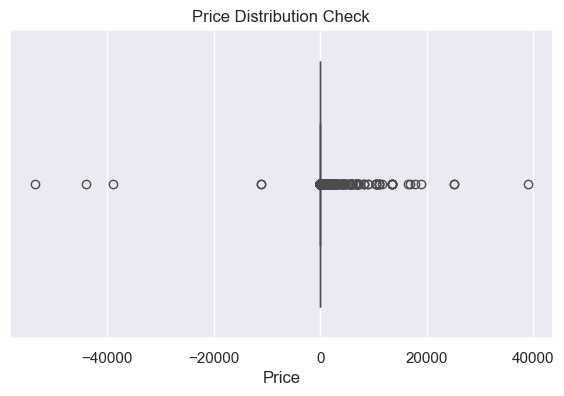

,count,mean,std,min,25%,50%,75%,max
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0


In [10]:
plt.figure(figsize=(7,4))
plt.title('Price Distribution Check')
sns.boxplot(x=df['Price'], orient='y')
plt.show()

display(pd.DataFrame(df['Price'].describe()).transpose())

### Quantity distribution

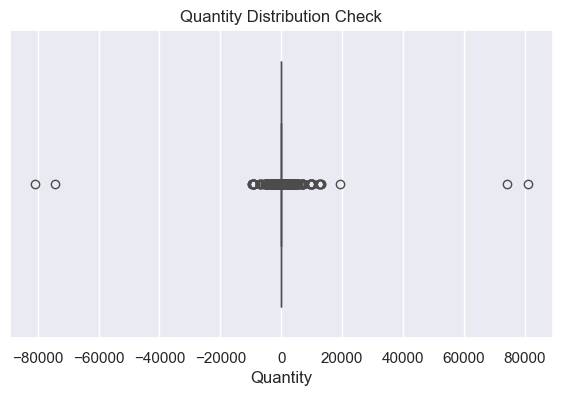

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0


In [11]:
plt.figure(figsize=(7,4))
plt.title('Quantity Distribution Check')
sns.boxplot(x=df['Quantity'], orient='y')
plt.show()

display(pd.DataFrame(df['Quantity'].describe()).transpose())

## Structuring

### Rename columns

In [12]:
df = df.rename(columns={
    'Customer ID': 'CustomerID',
    'Invoice': 'InvoiceID',
})

### Type conversion

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

category_cols = ['CustomerID','Country','StockCode','Description','InvoiceID']
df[category_cols] = df[category_cols].astype('category')

df['Quantity'] = df['Quantity'].astype('int64')
df['Price'] = df['Price'].astype('float64')

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceID    1067371 non-null  category      
 1   StockCode    1067371 non-null  category      
 2   Description  1062989 non-null  category      
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[us]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   category      
 7   Country      1067371 non-null  category      
dtypes: category(5), datetime64[us](1), float64(1), int64(1)
memory usage: 36.2 MB


## Cleaning

### Remove duplicates

In [14]:
df_before = df.copy()
df = df.drop_duplicates()

before, after = len(df_before), len(df)
removed = before - after
pct_removed = round((removed / before * 100), 2)

display(pd.DataFrame({
    'Before': [before],
    'After': [after],
    'Removed': [removed],
    'Pct_Removed (%)': [pct_removed]
}))

,Before,After,Removed,Pct_Removed (%)
0,1067371,1033036,34335,3.22


### Fill missing Description

In [15]:
df['Description'] = df['Description'].astype('object')

desc_map = (
    df.dropna(subset=['Description'])
      .drop_duplicates('StockCode')
      .set_index('StockCode')['Description']
)

df['Description'] = df['Description'].fillna(df['StockCode'].map(desc_map))
df['Description'] = df['Description'].fillna('Unknown Product')
df['Description'] = df['Description'].astype('category')

### Handle CustomerID

In [16]:
df['CustomerID'] = df['CustomerID'].astype('object')
df['IsGuest'] = df['CustomerID'].isna()
df['CustomerID'] = df['CustomerID'].fillna(99999).astype('int64')
df['CustomerID'] = df['CustomerID'].astype('category')

## Enriching

### Feature engineering (time)

In [17]:
df = df.assign(
    Hour = df['InvoiceDate'].dt.hour,
    Year = df['InvoiceDate'].dt.year,
    Month = df['InvoiceDate'].dt.month,
    Day = df['InvoiceDate'].dt.day,
    Week = df['InvoiceDate'].dt.isocalendar().week.astype('int64'),
    DayName = df['InvoiceDate'].dt.day_name().astype('category'),
    MonthName = df['InvoiceDate'].dt.month_name().astype('category')
)

### Business flags

In [18]:
df = df.assign(
    IsNegQty = df['Quantity'] < 0,
    IsNegPrice = df['Price'] < 0,
    IsCanceled = df['InvoiceID'].astype(str).str.startswith('C'),
    IsAdjusted = df['InvoiceID'].astype(str).str.startswith('A'),
    TotalPrice = df['Quantity'] * df['Price']
)

df['InvoiceDate'] = df['InvoiceDate'].dt.normalize()

## Validating

### Recheck missing

In [19]:
isna_counts = df.isna().sum().to_frame('Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
isna_counts = isna_counts.sort_values('Count', ascending=False)

print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
InvoiceID,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
Price,0,0.0
CustomerID,0,0.0
Country,0,0.0
IsGuest,0,0.0
Hour,0,0.0


### Outlier flagging (IQR)

In [20]:
cols = ['Quantity', 'Price']
outlier_summary = []

for col in cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    flag_col = 'Is{}Outlier'.format(col)
    df[flag_col] = (df[col] < lower) | (df[col] > upper)

    outlier_summary.append({
        'Column': col,
        'Lower': lower,
        'Upper': upper,
        'Outlier_Count': df[flag_col].sum(),
        'Pct (%)': round(df[flag_col].mean() * 100, 2)
    })

display(pd.DataFrame(outlier_summary))

,Column,Lower,Upper,Outlier_Count,Pct (%)
0,Quantity,-12.5,23.5,114434,11.08
1,Price,-3.1,8.5,66196,6.41


### Final check

In [21]:
df.info()
display(df.head())

<class 'pandas.DataFrame'>
Index: 1033036 entries, 0 to 1067370
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceID          1033036 non-null  category      
 1   StockCode          1033036 non-null  category      
 2   Description        1033036 non-null  category      
 3   Quantity           1033036 non-null  int64         
 4   InvoiceDate        1033036 non-null  datetime64[us]
 5   Price              1033036 non-null  float64       
 6   CustomerID         1033036 non-null  category      
 7   Country            1033036 non-null  category      
 8   IsGuest            1033036 non-null  bool          
 9   Hour               1033036 non-null  int32         
 10  Year               1033036 non-null  int32         
 11  Month              1033036 non-null  int32         
 12  Day                1033036 non-null  int32         
 13  Week               1033036 non-null  int64 

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,IsGuest,Hour,...,Week,DayName,MonthName,IsNegQty,IsNegPrice,IsCanceled,IsAdjusted,TotalPrice,IsQuantityOutlier,IsPriceOutlier
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,False,7,...,49,Tuesday,December,False,False,False,False,83.4,False,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,False,7,...,49,Tuesday,December,False,False,False,False,81.0,False,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,False,7,...,49,Tuesday,December,False,False,False,False,81.0,False,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,False,7,...,49,Tuesday,December,False,False,False,False,100.8,True,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,False,7,...,49,Tuesday,December,False,False,False,False,30.0,True,False


#### Data Specification

| Column | Description | Sample |
|---|---|---|
| **InvoiceID** | Nomor invoice untuk setiap transaksi. Umumnya berupa angka 6 digit unik dan dapat diawali huruf **“C”** yang menandakan transaksi pembatalan. Digunakan untuk mengidentifikasi dan mengelompokkan item dalam satu transaksi. | 536365 |
| **StockCode** | Kode produk atau item yang mengidentifikasi setiap produk secara unik. Biasanya berupa angka 5 digit atau kombinasi alfanumerik yang merepresentasikan item tertentu. | 85123A |
| **Description** | Nama atau deskripsi produk dalam bentuk teks yang menjelaskan item pada baris transaksi. Nilai dapat kosong pada beberapa kasus data. | WHITE HANGING HEART T-LIGHT HOLDER |
| **Quantity** | Jumlah unit produk pada setiap baris transaksi dalam bentuk numerik. Nilai positif menunjukkan pembelian, sedangkan nilai negatif dapat mengindikasikan pengembalian atau pembatalan item. | 6 |
| **InvoiceDate** | Tanggal dan waktu saat transaksi dibuat dalam format datetime. Kolom ini merepresentasikan waktu terjadinya transaksi. | 2010-12-01 08:26:00 |
| **Price** | Harga per unit produk dalam bentuk numerik (float). Nilai ini merupakan harga item sebelum dikalikan dengan Quantity. | 2.55 |
| **CustomerID** | Nomor pelanggan yang mengidentifikasi customer secara unik. Biasanya berupa angka 5 digit dan dapat bernilai kosong jika pelanggan tidak teridentifikasi. | 17850 |
| **Country** | Nama negara tempat pelanggan berdomisili dalam bentuk kategorikal teks. Digunakan untuk menunjukkan lokasi pelanggan. | United Kingdom |
| **IsGuest** | Flag boolean yang menunjukkan transaksi tanpa CustomerID. Nilai True menandakan pelanggan tidak teridentifikasi. | False |
| **IsQuantityOutlier** | Flag boolean yang menandai apakah nilai Quantity terdeteksi sebagai outlier berdasarkan proses analisis data. | False |
| **IsPriceOutlier** | Flag boolean yang menandai apakah nilai Price terdeteksi sebagai outlier berdasarkan proses analisis data. | False |
| **Hour** | Jam transaksi dalam bentuk numerik yang diturunkan dari InvoiceDate. | 8 |
| **Year** | Tahun transaksi dalam bentuk numerik yang diturunkan dari InvoiceDate. | 2010 |
| **Month** | Bulan transaksi dalam bentuk numerik (1–12) yang diturunkan dari InvoiceDate. | 12 |
| **Day** | Hari dalam bulan transaksi dalam bentuk numerik yang diturunkan dari InvoiceDate. | 1 |
| **Week** | Minggu dalam tahun transaksi dalam bentuk numerik yang diturunkan dari InvoiceDate. | 48 |
| **DayName** | Nama hari transaksi dalam bentuk teks yang diturunkan dari InvoiceDate. | Wednesday |
| **MonthName** | Nama bulan transaksi dalam bentuk teks yang diturunkan dari InvoiceDate. | December |
| **IsNegQty** | Flag boolean yang menunjukkan Quantity bernilai negatif. | False |
| **IsNegPrice** | Flag boolean yang menunjukkan Price bernilai negatif. | False |
| **IsCanceled** | Flag boolean yang menunjukkan transaksi pembatalan, umumnya berdasarkan InvoiceID yang diawali huruf “C”. | False |
| **IsAdjusted** | Flag boolean yang menandakan baris transaksi merupakan hasil penyesuaian atau koreksi data. | False |
| **TotalPrice** | Nilai total baris transaksi yang merupakan hasil perkalian Quantity dan Price. | 15.30 |

## Export

In [22]:
df.to_csv(
    '../datasets/online-retail-ii-cleaned.csv.zstd',
    sep=';',
    index=False,
    compression='zstd'
)

## References

https://archive.ics.uci.edu/dataset/502/online+retail+ii

https://www.ibm.com/think/topics/data-wrangling